# README
This notebook is used to plot the error curves.

In [12]:
import matplotlib.pyplot as plt
import os
import json
import pandas
import math
import matplotlib
import numpy as np
import seaborn as sns
font = {'family': 'Arial'}

matplotlib.rcParams['mathtext.fontset'] = 'custom'

matplotlib.rcParams['mathtext.rm'] = 'Arial'

matplotlib.rcParams['mathtext.it'] = 'Arial'

matplotlib.rc('font', **font)
matplotlib.rcParams['pdf.fonttype'] = 42  # make the text editable for Adobe Illustrator
matplotlib.rcParams['ps.fonttype'] = 42


# matplotlib.rc('font', **font0)
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)


def set_ax_font_size(ax, fontsize=10):
    ax.tick_params(axis='y',
                   labelsize=fontsize  # y轴字体大小设置
                   )
    ax.tick_params(axis='x',
                   labelsize=fontsize  # x轴字体大小设置
                   )

In [13]:
dataset_names = ['Li','Zn','Na','CALB']
seeds = [42, 2021, 2024]
result_recorder_alpha_acc1 = {}
result_recorder_MAPE = {}
for dataset_name in dataset_names:
    data_path = f'../performance_data/seen_unseen_results/{dataset_name}/'
    files = os.listdir(data_path)
    top3_models_alpha_acc = []
    top3_models_MAPE = []
    for file in files:
        if file.startswith('number_alphaAcc2'):
            # 10%-Acc is not considered now
            continue

        model_name = file.split('_')[2]
        if model_name not in top3_models_alpha_acc and file.startswith('number_alphaAcc1'):
            top3_models_alpha_acc.append(model_name)
        elif model_name not in top3_models_MAPE and file.startswith('number_MAPE'):
            top3_models_MAPE.append(model_name)
    
    # average the results of three random runs
    # Get the results for 15%-Acc
    for model_name in top3_models_alpha_acc:
        total_res_dicts = []
        for file in files:
            if file.startswith(f'number_alphaAcc1_{model_name}'):
                res_dict = json.load(open(f'{data_path}{file}'))
                total_res_dicts.append(res_dict)

        average_std_dict = {}
        for i in range(1,101):
            alpha_accs = [res_dict[str(i)] for res_dict in total_res_dicts]
            average_std_dict[str(i)] = (float(np.mean(alpha_accs)*0.01), float(np.std(alpha_accs))*0.01)
        result_recorder_alpha_acc1[f'{dataset_name}-{model_name}'] = average_std_dict
    
    # Get the results for MAPE
    for model_name in top3_models_MAPE:
        total_res_dicts = []
        for file in files:
            if file.startswith(f'number_MAPE_{model_name}'):
                res_dict = json.load(open(f'{data_path}{file}'))
                total_res_dicts.append(res_dict)

        average_std_dict = {}
        for i in range(1,101):
            mapes = [res_dict[str(i)] for res_dict in total_res_dicts]
            average_std_dict[str(i)] = (float(np.mean(mapes)), float(np.std(mapes)))
        result_recorder_MAPE[f'{dataset_name}-{model_name}'] = average_std_dict
    
        


## Plot the MAPE and alpha-acc

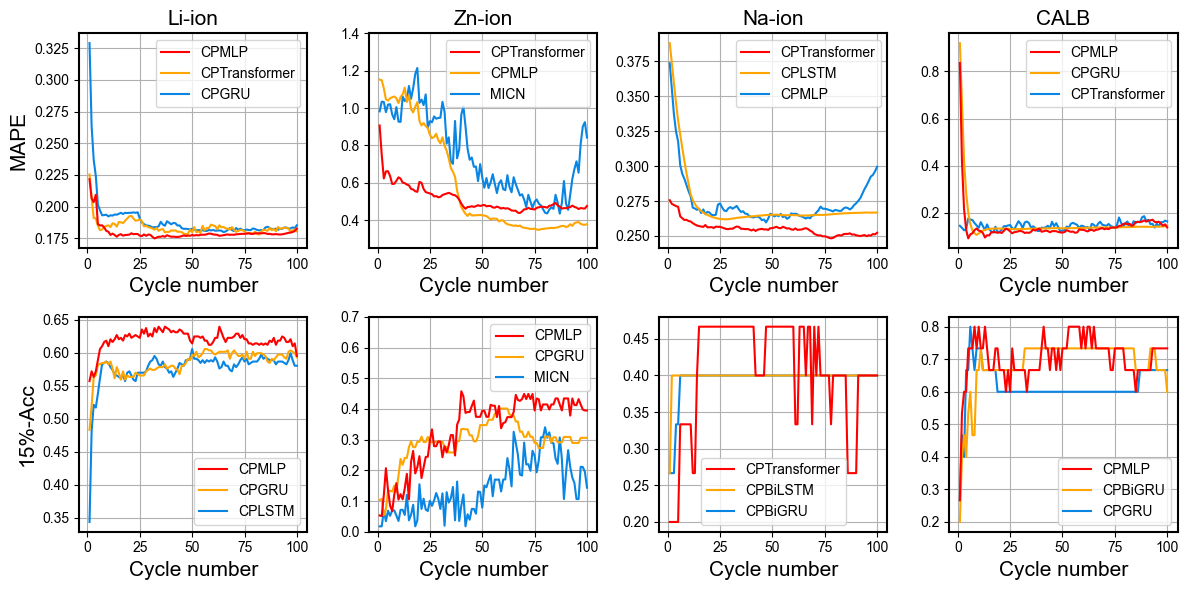

In [14]:
fig = plt.figure(figsize=(12,6))
rows = 2
columns = 4
total_keys = list(result_recorder_MAPE.keys())

name_mapping = {
    'CyclePatchTransformer': 'CPTransformer',
    'HiMLP': 'CPMLP',
    'HiGRU': 'CPGRU',
    'HiBiGRU': 'CPBiGRU',
    'HiLSTM': 'CPLSTM',
    'HiBiLSTM': 'CPBiLSTM'
}
# MAPE
# Li
Li_models = ['HiMLP', 'CPTransformer', 'CPGRU']
ax1 = plt.subplot(rows, columns, 1)
for rank, model in enumerate(Li_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_MAPE.items():
        if not key.startswith(f'Li-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax1)
plt.xlabel('Cycle number', fontsize=15)
plt.ylabel('MAPE', fontsize=15)
plt.title('Li-ion', fontsize=15)
plt.grid()
plt.legend()
# Zn
Zn_models = ['CyclePatchTransformer', 'HiMLP', 'MICN']
ax2 = plt.subplot(rows, columns, 2)
for rank, model in enumerate(Zn_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_MAPE.items():
        if not key.startswith(f'Zn-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax2)
plt.xlabel('Cycle number', fontsize=15)
plt.ylim(0.25, 1.4)
plt.title('Zn-ion', fontsize=15)
plt.grid()
plt.legend()
# Na
NA_models = ['CyclePatchTransformer', 'HiLSTM', 'HiMLP']
ax3 = plt.subplot(rows, columns, 3)
for rank, model in enumerate(NA_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_MAPE.items():
        if not key.startswith(f'Na-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax3)
plt.xlabel('Cycle number', fontsize=15)
plt.title('Na-ion', fontsize=15)
plt.grid()
plt.legend()

# CALB
CALB_models = ['CPMLP', 'CPGRU', 'CPTransformer']
ax3 = plt.subplot(rows, columns, 4)
for rank, model in enumerate(CALB_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_MAPE.items():
        if not key.startswith(f'CALB-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax3)
plt.xlabel('Cycle number', fontsize=15)
plt.title('CALB', fontsize=15)
plt.grid()
plt.legend()

# alpha-acc
# Li
Li_models = ['HiMLP', 'CPGRU', 'CPLSTM']
ax1 = plt.subplot(rows, columns, columns+1)
for rank, model in enumerate(Li_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_alpha_acc1.items():
        if not key.startswith(f'Li-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax1)
plt.xlabel('Cycle number', fontsize=15)
plt.ylabel('15%-Acc', fontsize=15)
# plt.title('Li-ion')
plt.grid()
plt.legend()
# Zn
Zn_models = ['HiMLP', 'HiGRU',  'MICN']
ax2 = plt.subplot(rows, columns, columns+2)
for rank, model in enumerate(Zn_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_alpha_acc1.items():
        if not key.startswith(f'Zn-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax2)
plt.xlabel('Cycle number', fontsize=15)
plt.ylim(0,0.7)
# plt.title('Zn-ion')
plt.grid()
plt.legend()
# Na
Na_models = ['CyclePatchTransformer', 'HiBiLSTM', 'HiBiGRU']
ax3 = plt.subplot(rows, columns, columns+3)
for rank, model in enumerate(Na_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_alpha_acc1.items():
        if not key.startswith(f'Na-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax3)
plt.xlabel('Cycle number', fontsize=15)
# plt.title('CALB')
plt.grid()
plt.legend()

# CALB
CALB_models = ['CPMLP', 'CPBiGRU', 'CPGRU']
ax3 = plt.subplot(rows, columns, columns+4)
for rank, model in enumerate(CALB_models):
    label_name = name_mapping[model] if model in name_mapping else model
    for key, value in result_recorder_alpha_acc1.items():
        if not key.startswith(f'CALB-{model}'):
            continue
        xs = []
        means = []
        stds = []
        for tmp_key, data in value.items():
            xs.append(int(tmp_key))
            means.append(data[0])
            stds.append(data[1])
        if rank == 0:
            plt.plot(xs, means, color='red',zorder=5,label=label_name)
        elif rank == 1:
            plt.plot(xs, means, color='orange',zorder=4,label=label_name)
        elif rank == 2:
            plt.plot(xs, means, color='#0985E3',zorder=3,label=label_name)

set_ax_linewidth(ax3)
plt.xlabel('Cycle number', fontsize=15)
# plt.title('CALB')
plt.grid()
plt.legend()


fig.tight_layout()
plt.savefig(f'../figures/error_curve.pdf')
plt.savefig(f'../figures/error_curve.jpg',dpi=600)
